In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


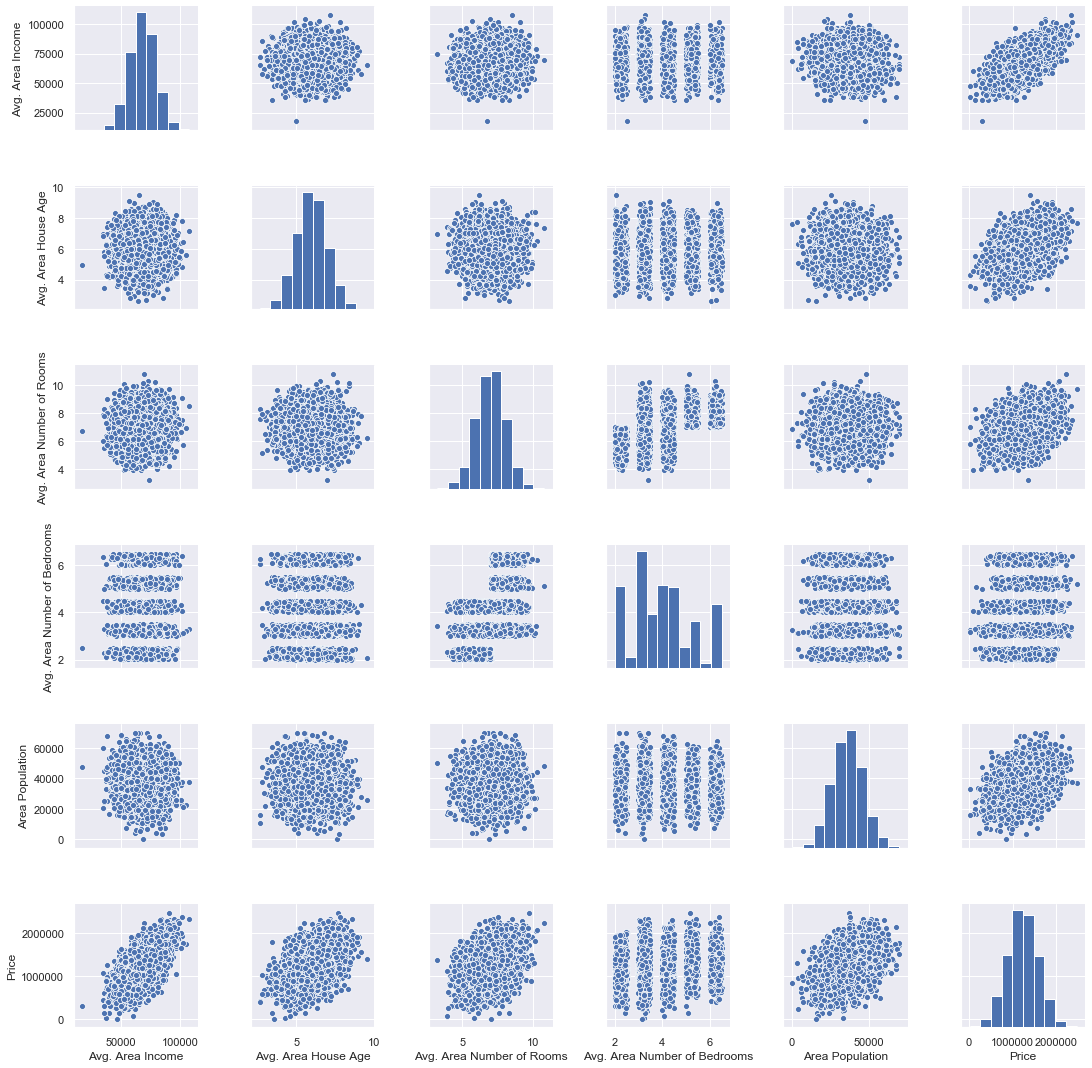

In [6]:
sns.pairplot(df)

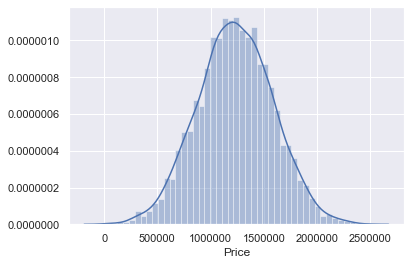

In [7]:
sns.distplot(df['Price'])

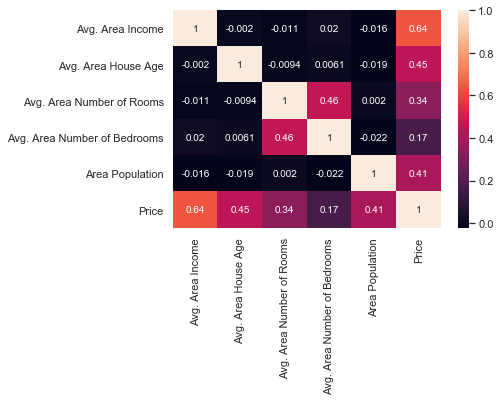

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
x.shape

(5000, 5)

In [26]:
y=df['Price']
y.shape

(5000,)

# Train Test Split

Split whole data into 2 parts - Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
print(x_test.shape)
print(y_test.shape)

(1500, 5)
(1500,)


# Creating the model

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [17]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficients

In [18]:
print(lm.intercept_)

-2638673.4261905826


In [19]:
coeff = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])

In [20]:
coeff

,Coefficients
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


* If all the other features are fixed, then 1 unit increase in Avg. Area Income will increase Housing price by 21.62.

# Making predictions using our model

In [21]:
predictions = lm.predict(x_test)

In [23]:
predictions

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.597372  ])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

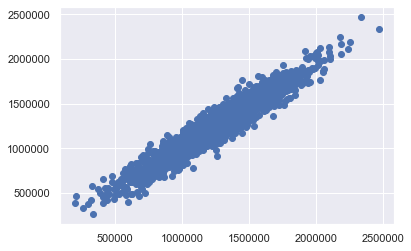

In [30]:
plt.scatter(y_test,predictions)

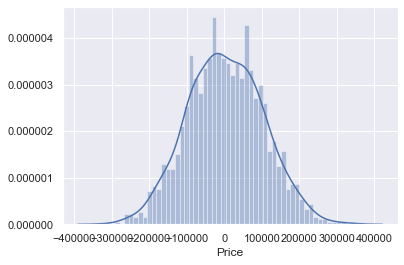

In [32]:
sns.distplot(y_test-predictions,bins=54)

# Evaluation of model

In [33]:
from sklearn import metrics

In [36]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error :  81135.56609336879
Mean Squared Error :  10068422551.400928
Root Mean Squared Error :  100341.5295448546
